### imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from Energy import OUTPUT_DIR, set_debug, debug, switch_debug, get_debug
from Energy.my_energy_reports import create_energy_reports
from Energy.subProjection.my_projection import create_monthly_projection
from Energy.subGraphs.my_plots import swarmplot
from Energy.subTools.projection_tools import projection_in_graph

### setings

In [2]:
set_debug(False)

False

### create energy obiect

In [3]:
energy_object, _ = create_energy_reports(
    refresh = False,
    export_back = 0.8,
    kWh_cost = 0.65,
)

### easy use

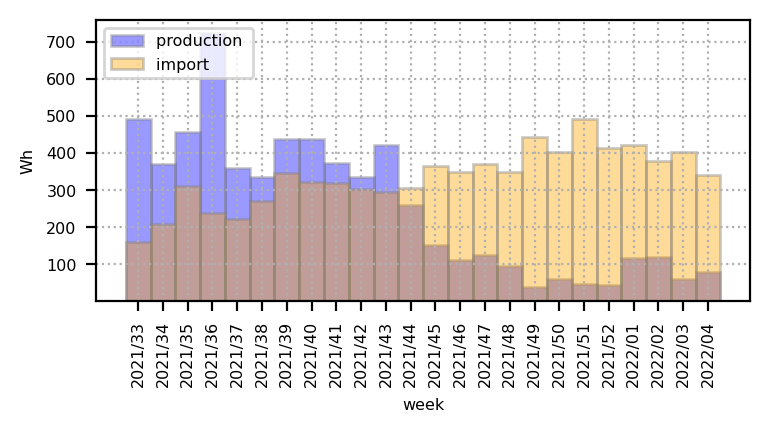

In [4]:
energy_object.basic_barplot(
    group_by="week", columns=['production_', 'import_'],
    agg='mean', 
    figsize=(4,2)
)

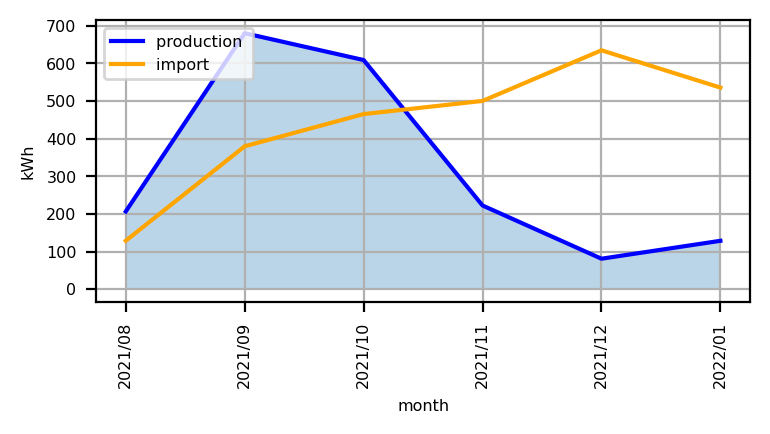

In [5]:
energy_object.basic_lineplot(
    group_by="month", columns=['production_', 'import_'],
    agg='sum', fill=["production_"], 
    figsize=(4,2)
)

No handles with labels found to put in legend.


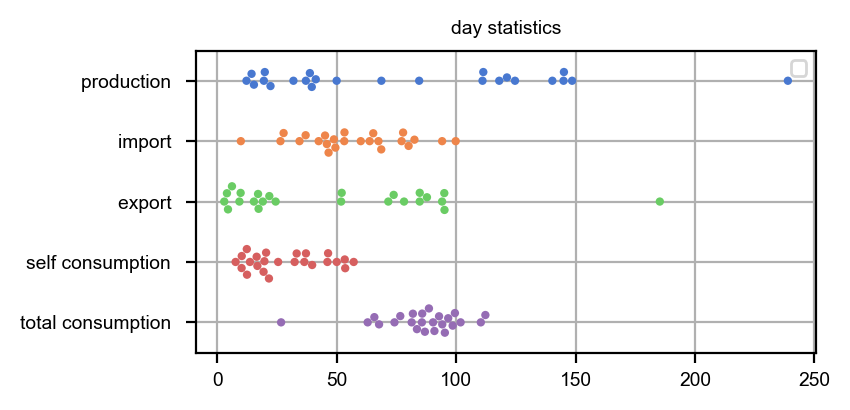

In [6]:
day_hours = [8,9,10,11,12,13,14,15,16,17,18,19]
swarmplot(
    energy_object.get_energy[energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=3, 
    title="day statistics", 
    figsize=(4,2)
)

C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


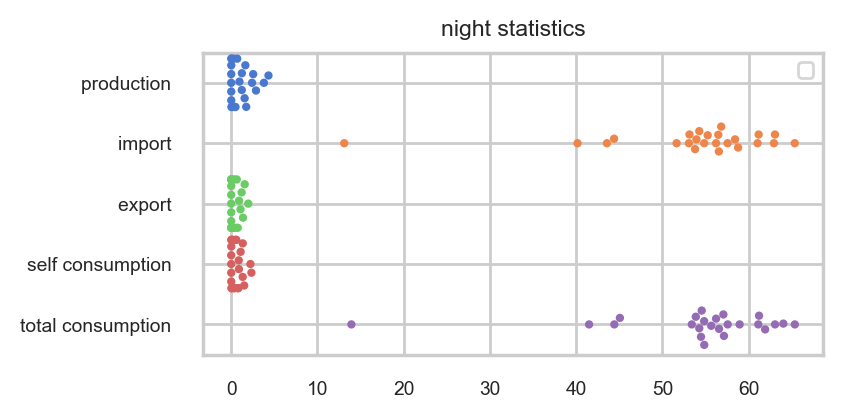

In [7]:
swarmplot(
    energy_object.get_energy[~energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=3, 
    title="night statistics", 
    figsize=(4,2)
)

## Show projection

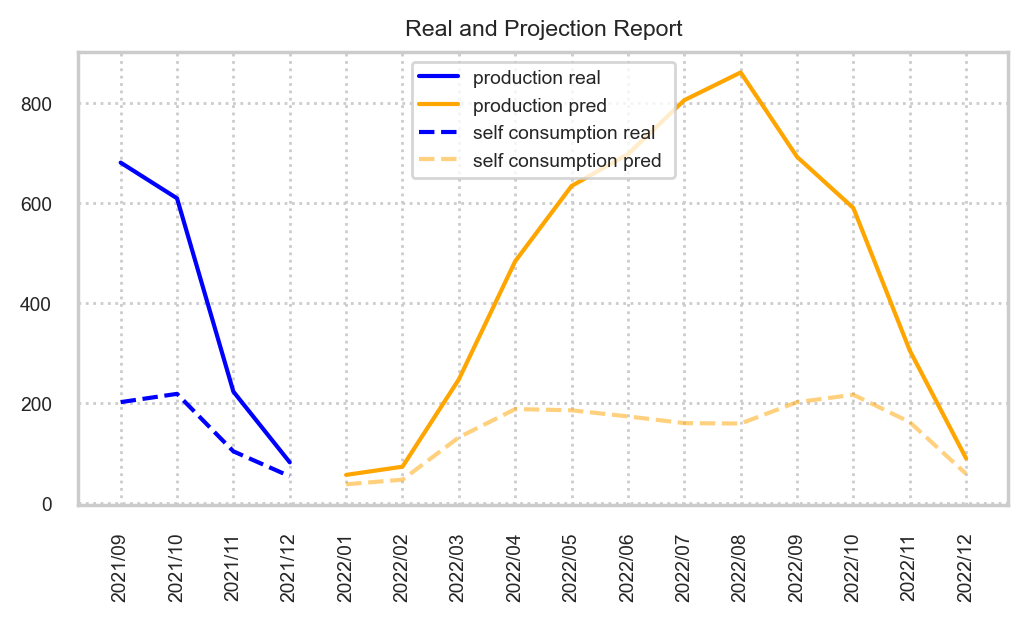

In [8]:
energy_df, projection_df = create_monthly_projection(energy_object, 12)

In [9]:
projection_df

,month,month_str,%sun,%midsun,%cloud,avg_temp,suntime_minutes,production_,self_consumption_
0,1,2022/01,0.116129,0.335484,0.548387,2,518.451613,55.725653,36.992655
1,2,2022/02,0.113475,0.354610,0.531915,3,608.068966,72.148536,46.150041
2,3,2022/03,0.141935,0.435484,0.422581,8,714.806452,246.684527,130.879512
3,4,2022/04,0.190000,0.496667,0.313333,15,828.066667,482.889031,187.328018
4,5,2022/05,0.212903,0.525806,0.261290,20,926.451613,633.333807,184.909969
5,6,2022/06,0.160000,0.600000,0.240000,23,978.066667,696.845819,172.648085
6,7,2022/07,0.248387,0.548387,0.203226,25,952.451613,804.850322,159.224160
7,8,2022/08,0.274194,0.525806,0.200000,26,865.612903,860.289548,158.429006
8,9,2022/09,0.250000,0.450000,0.300000,21,756.700000,691.578912,201.125327
9,10,2022/10,0.296774,0.400000,0.303226,16,644.387097,589.209199,215.962116


In [10]:
df = energy_object.get_energy

In [23]:
night_hours = [23, 0, 1, 2, 3, 4, 5]
df = df[df['hour'].isin(night_hours)]
df = df.drop(df[df['source']=='SolarEdge'].index.to_list())
df = df.drop(df[df['import_']==0].index.to_list())

In [24]:
# df[['hour', 'import_']].groupby('hour').agg(['min', 'max', 'mean']).reset_index
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 3959 to 7847
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1135 non-null   datetime64[ns]
 1   production_         1135 non-null   float64       
 2   source              1135 non-null   object        
 3   direction           1135 non-null   object        
 4   export_             1135 non-null   float64       
 5   import_             1135 non-null   float64       
 6   day                 1135 non-null   object        
 7   time                1135 non-null   int64         
 8   year                1135 non-null   object        
 9   month               1135 non-null   object        
 10  week                1135 non-null   object        
 11  hour                1135 non-null   int64         
 12  balance_            1135 non-null   float64       
 13  self_consumption_   1135 non-null   float64  

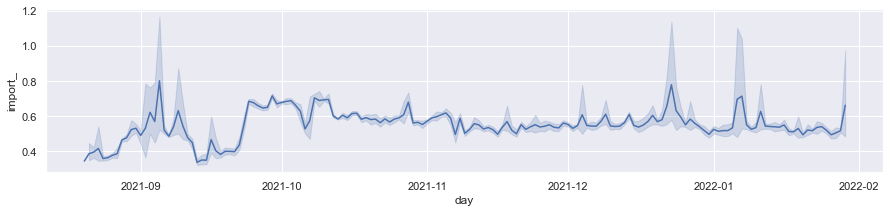

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))

sns.set_theme(style="darkgrid")

sns.lineplot(x="day", y="import_", data=df, ax=ax)
# ax.set_xticks(night_hours)
plt.savefig('night_hours.png')


In [22]:
df.to_excel('night_hours.xlsx')

In [26]:
df[['hour', 'import_']].groupby('hour').agg(['min', 'max', 'mean']).reset_index

<bound method DataFrame.reset_index of      import_                 
         min    max      mean
hour                         
0      0.326  1.809  0.564636
1      0.322  1.163  0.539512
2      0.311  0.710  0.531920
3      0.327  0.703  0.529747
4      0.299  0.746  0.530642
5      0.307  0.940  0.549846
23     0.345  1.890  0.624736>

In [16]:
df[['hour', 'import_']]

,hour,import_
0,0,0.000
1,1,0.000
2,2,0.000
3,3,0.000
4,4,0.000
...,...,...
7826,2,0.551
7827,3,0.483
7828,4,0.453
7829,5,0.462
